Make predictions with the best model ⛳
-------------------------

It is time to make predictions with the best model (model_lhGqMDq) and provide the obtained attention. The model was train in [model_search](best_model_search.ipynb) with the following hyperparameters:

- <i style="color:orange">Learning rate</i>: 0.000092309
- <i style="color:orange">Batch size</i>: 16
- <i style="color:orange">Horizontal flip probability</i>: 0.22943
- <i style="color:orange">Vertical flip probability</i>: 0.13244
- <i style="color:orange">Gray scale probability</i>: 0.12331
- <i style="color:orange">Weight Decay</i>: 0.0
- <i style="color:orange">Rotation</i>: True


We need to recuperate the best model from the checkpoint and the test dataset and provide them to the prediction function created in [vit_model_metrics](vit_model.ipynb). We will display the results in the notebook.

Let us import some libraries.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# importing some libraries
from fake_face_detection.data.fake_face_dataset import FakeFaceDetectionDataset
from fake_face_detection.metrics.make_predictions import make_predictions
from transformers import ViTForImageClassification
from transformers import ViTFeatureExtractor
from torch.utils.data import DataLoader
from torch.nn import functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
import pytorch_lightning as pl
from PIL import Image
import pandas as pd
import numpy as np
import pickle

# set a seed for all the following process
pl.seed_everything(0)


Global seed set to 0


0

Let us first recuperate, below, the model from the checkpoints.

In [2]:
# initialize the path of the best model
best_model_path = 'data/checkpoints/model_lhGqMDq/checkpoint-440'

# recuperate the images characteristics
with open('data/extractions/fake_real_dict.txt', 'rb') as f:
    
    depick = pickle.Unpickler(f)
    
    characs = depick.load()

# recuperate the model and print the configurations
vit_model = ViTForImageClassification.from_pretrained(
    best_model_path,
    num_labels = len(characs['ids']),
    id2label = {name: key for key, name in characs['ids'].items()},
    label2id = characs['ids']
)

We can recuperate the test dataset.

In [3]:
# recuperate the feature extractor
feature_extractor = ViTFeatureExtractor('google/vit-base-patch16-224-in21k')

# recuperate the test dataset
test_dataset = FakeFaceDetectionDataset(
    'data/real_and_fake_splits/test/training_fake/',
    'data/real_and_fake_splits/test/training_real/',
    characs['ids'],
    feature_extractor,
    transformer_kwargs={'return_tensors': 'pt'}
)

It is time now to make predictions on the test and show the results.

In [4]:
# make predictions on the test set
predictions, metrics, fig = make_predictions(test_dataset, vit_model.cpu(), tag="test attention")


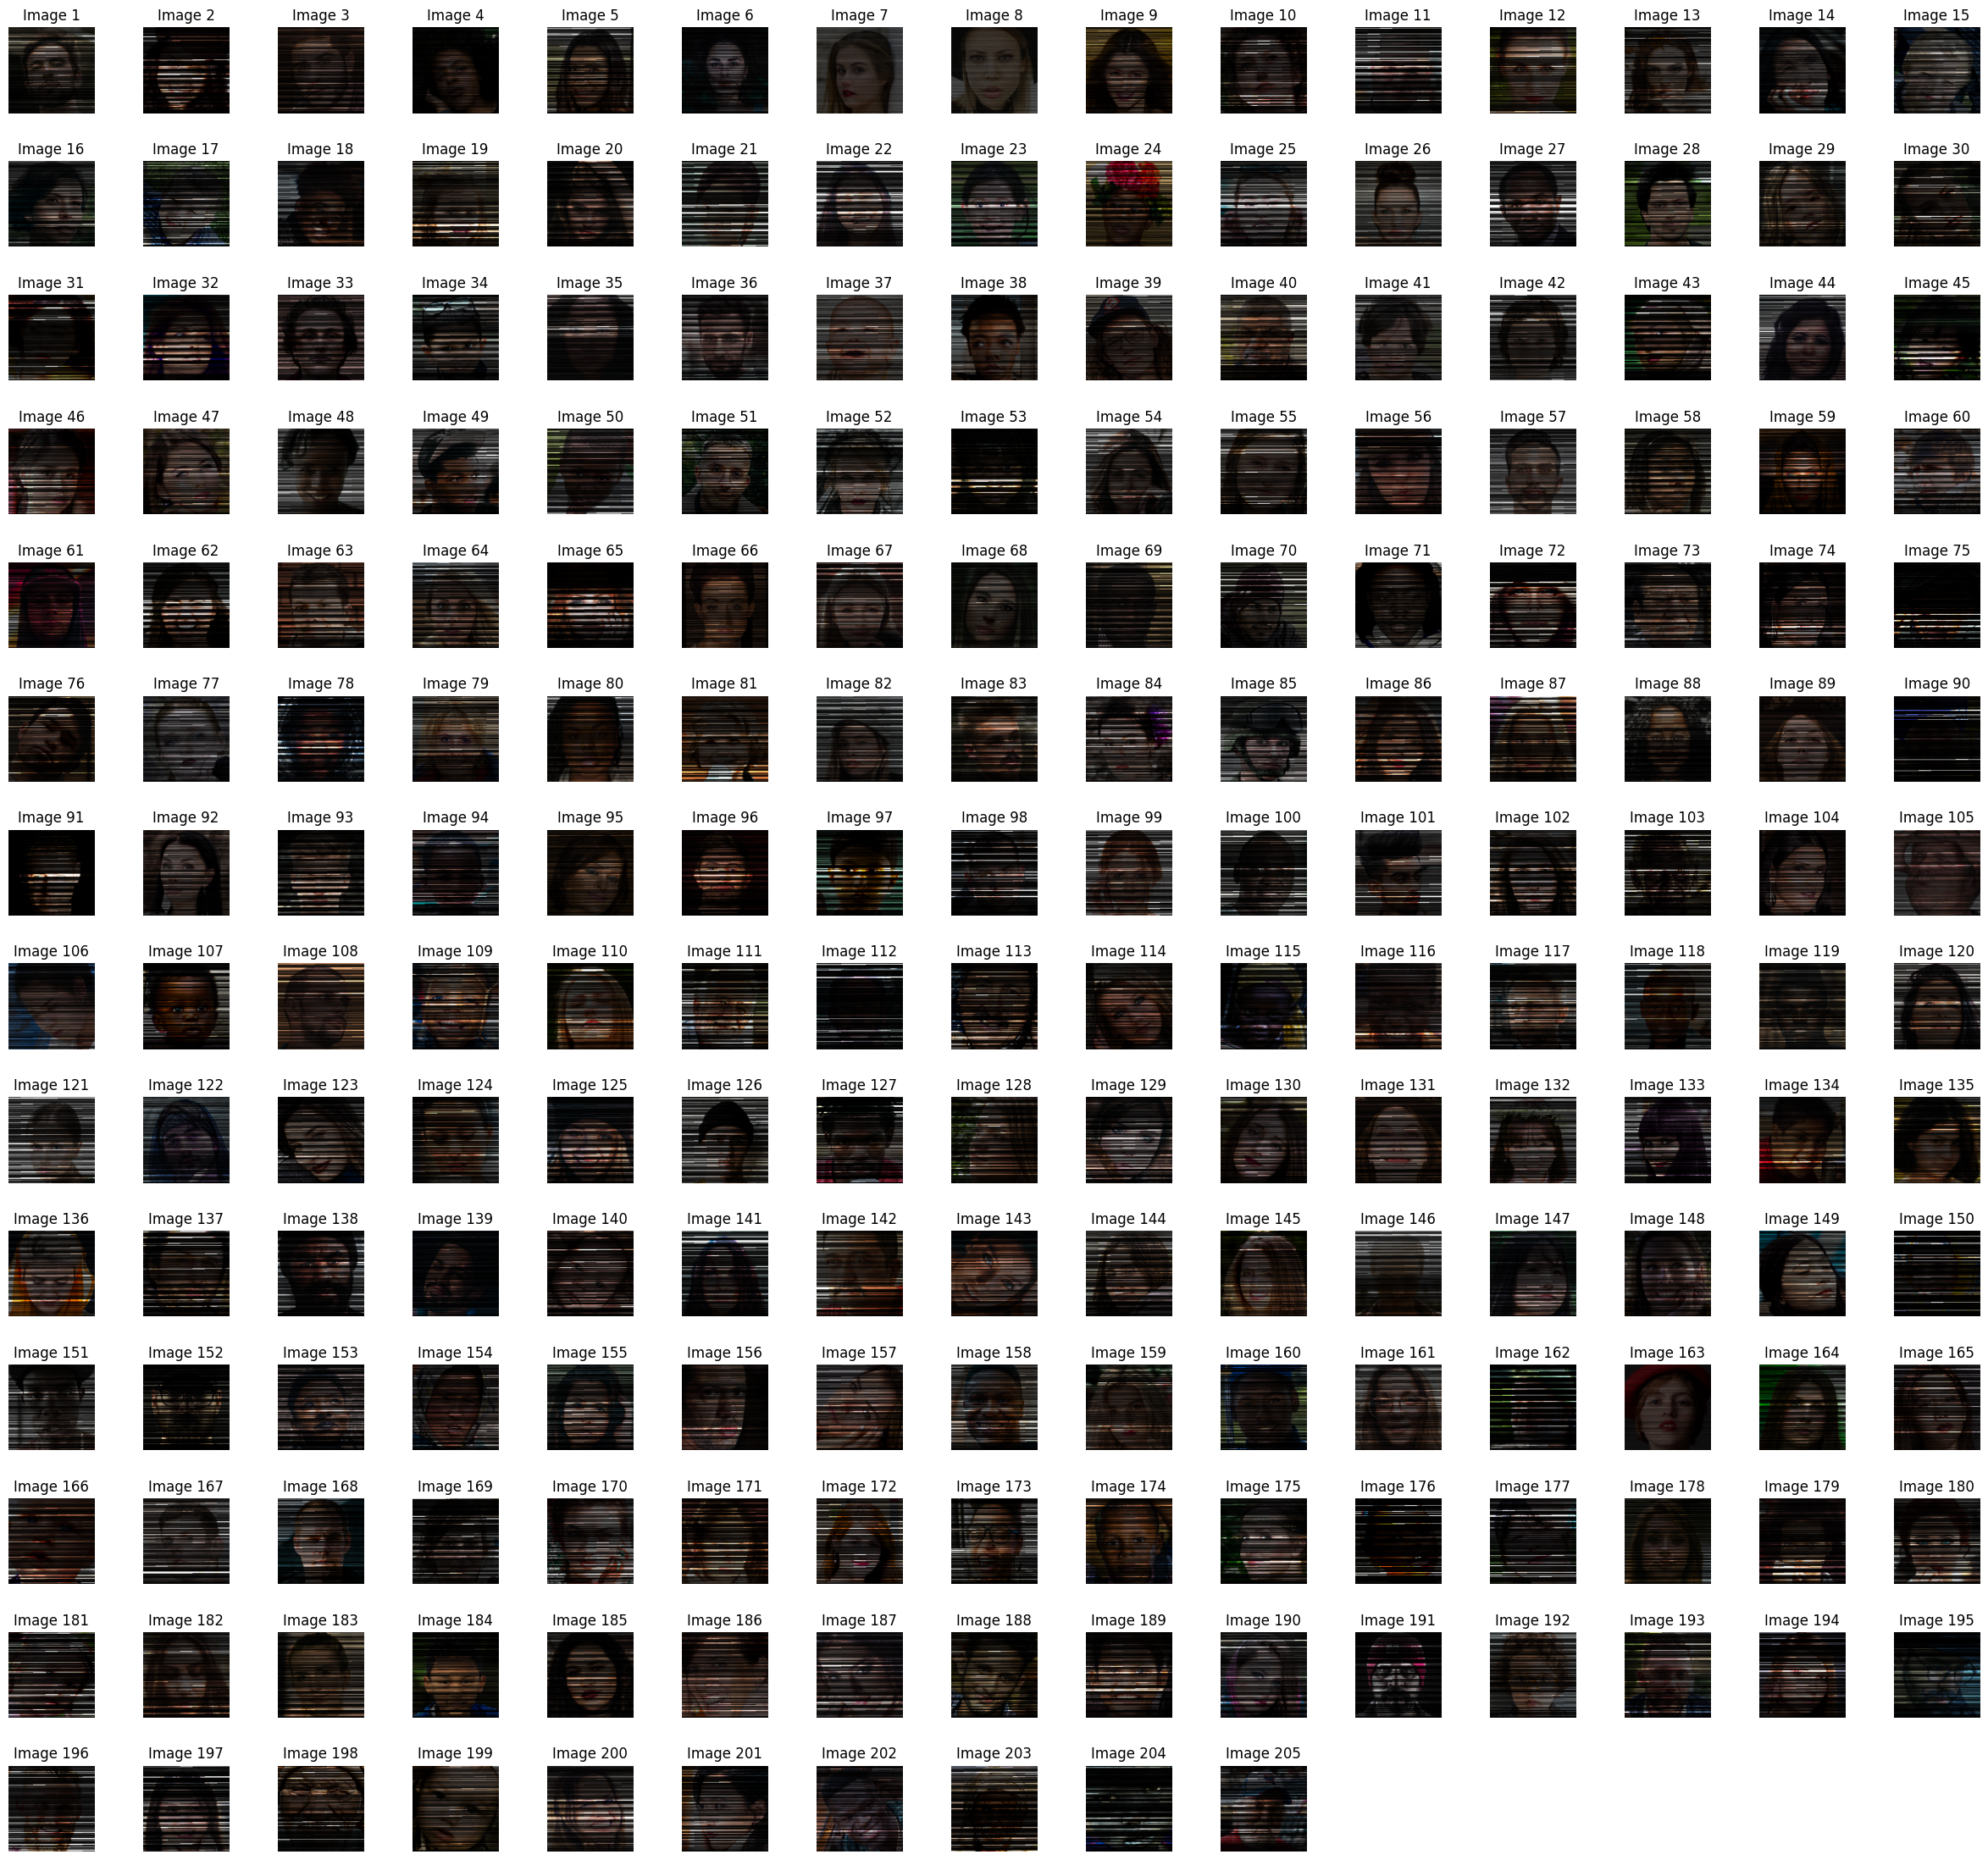

In [5]:
fig

Show the predictions

In [6]:
# show the results
convert = lambda x: vit_model.config.id2label[x]

predictions['true_labels'] = predictions['true_labels'].map(convert)
predictions['predicted_labels'] = predictions['predicted_labels'].map(convert)


In [7]:
# 30 samples
pd.options.display.max_rows = 30
predictions.sample(30)

,true_labels,predicted_labels
52,fake,fake
181,real,real
5,fake,fake
18,fake,fake
188,real,fake
170,real,fake
76,fake,fake
154,real,real
104,real,real
33,fake,fake


Show the metrics

In [8]:
metrics

{'accuracy': 0.8, 'f1': 0.7918781725888325, 'loss': 0.4556301248030386}

We attained the objective on the validation set and almost on the test set. The val accuracy and the f1 score calculated on the test set decreased by nearly `5` compared to that obtained on the validation set.